## MMA 860: Assignment 2
#### Team Istanbul
This file contains the code for all questions in the Assignment 2

In [1]:
# %pip install openpyxl
# %matplotlib inline

In [2]:
#importing libraries
import pandas as pd
import numpy as np

import statsmodels.imputation.mice as mice
import statsmodels.api as sm
from statsmodels.formula.api import ols

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn import linear_model
# import scipy.stats

from statsmodels.stats.diagnostic import het_breuschpagan

import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# import shutil



#Data source
file_path = "860 Assignment 2 Data.xlsx"

### UDFs

In [3]:
#checking null values in a dataframe
def check_null(df):
    variables = df.columns[2:].tolist()

    #checking for null values in all inpedendent variables
    for var in variables:
        df_nulls    = df[pd.isnull(df[var])]
        print(f"Displaying results for column: {var}")
        print(df_nulls)
        print("\n")
    

In [4]:
#Convert string columns to categorical columns
def to_cat(df):
    cat_cols    = df.select_dtypes(include=['object']).columns.tolist()
    df_dummy    = pd.get_dummies(df, columns=cat_cols, dtype='int')
    
    return df_dummy 

In [5]:
def reg_eq(df, y, features, model):
    coeffs = model.params
    intercept = model.params[0]

    equation = ""
    for coef, feat in zip(model.params, features):
        equation += f"({coef:.2f} x {feat}) + "

    print(f"The linear regression model for is: {y} = {equation}({model.params[0]:.3f})")
    print(f"R-squared value: {model.rsquared:.5f}")


In [6]:
#Perform Linear Regression
def lin_reg(df, y, features):

    variables   = df[features]
    y_value     = df[y]

    #run linear regression fitting
    reg = linear_model.LinearRegression()
    reg.fit(variables, y_value)

    #Calcute R-square value
    r2 = reg.score(variables, y_value)

    #Linear regression equation
    equation = ""
    for coef, feat in zip(reg.coef_, features):
        equation += f"({coef:.3f} x {feat}) + "

    print(f"The linear regression model is: {y} = {equation}({reg.intercept_:3f})")
    print(f"R-squared value: {r2:.5f}")
    
    return reg

### Code for Questions

#### Question 1: Statistics' Theory

##### Part a: Misinterpretation of the Joint F-Test

**Statement:**  
> “If the p-value for the ‘joint F-test’ is too large – say greater than 0.05 – there is really no point in looking at the rest of the regression output. The model is just plain crap.”

**Correction:**
This statement is **partially incorrect**. A high p-value (p > 0.05) for the joint F-test means that the independent variables, as a group, do not significantly improve predictions of the dependent variable. Specifically, we fail to reject the null hypothesis that all coefficients are simultaneously zero.

However, this **doesn’t automatically mean the model is useless**. Individual predictors might still be significant, even if the overall model isn’t. Before dismissing the model, check the p-values of each independent variable. If some are statistically significant (p < 0.05), refining the model by removing weak predictors and keeping strong ones could still make it useful.

Additionally, the conventional **0.05 threshold shouldn’t be treated as absolute** – the appropriate significance level depends on context and the consequences of Type I/II errors. Sample size also matters – with very small samples, important relationships might not appear significant. Even if statistically insignificant, the model might still provide practical insights or suggest relationships worth investigating further.

If **all predictor p-values are high**, then yes, the model lacks predictive power and should be reconsidered. Otherwise, it may still have value with some adjustments.

##### Part b: Handling Outliers Incorrectly

**Statement:**  
> “When you detect an outlier, you should just replace it with the mean value of the dataset.”

**Correction:**
This is **not a good approach**. Replacing outliers with the mean can distort the dataset and lead to misleading conclusions. The mean is influenced by extreme values, so if an outlier exists, it likely affects the mean itself. Substituting the outlier with this distorted value does not accurately represent the data.

**Better Approaches to Handling Outliers:**
- **Understand why the outlier exists:**  
  - If it’s a data entry error → Correct or remove it.  
  - If it’s valid but irrelevant to the analysis → Consider exclusion.  
  - If it carries meaningful information → Retain it.  

- **Alternative methods:**
  - **Use the median** (less affected by extreme values).  
  - **Apply Winsorization** (cap extreme values at a reasonable threshold).  
  - **Use robust models** (tree-based methods, robust regression).  
  - **Investigate why the outlier occurred** to understand the underlying process.  
  - **Consider transformations** if appropriate.  
  - **Document modifications** for transparency.  

Simply replacing outliers with the mean can **mask important patterns or introduce artificial trends**. The key is to assess whether an outlier disrupts analysis or provides valuable insights.


##### Part c: The 0.05 Alpha Rule in Hypothesis Testing

**Statement:**  
> “When conducting a hypothesis test, like the t-test, you should always set alpha = 0.05.”

**Correction:**
This **isn’t always the case**. Choosing the right alpha level depends on the situation and how much risk the company or decision-makers are willing to accept. It’s about balancing the consequences of making a false claim (**Type I error**) versus missing something important (**Type II error**).

**Context-Dependent Alpha Levels:**
- **High-risk decisions** (e.g., medical treatments, structural integrity) → **Lower alpha (0.01)** to minimize false positives.
- **Business settings** (e.g., product launches, marketing strategies) → **Higher alpha (0.10)** to allow for flexibility and innovation.

The **0.05 level became a convention**, but it’s **not universally optimal**. The appropriate significance level should consider:
- The **consequences of Type I errors** (false positives).  
- The **consequences of Type II errors** (false negatives).  
- **Context and field of study** (medical research vs. exploratory research).  
- **Sample size considerations** (smaller samples may require different thresholds).  

Alpha **isn’t a one-size-fits-all rule**. It should be chosen based on the level of risk involved and what matters most—safety, financial impact, or opportunities for growth.


##### Part d: Misunderstanding Heteroskedasticity in Survey Data

**Statement:**  
> “Our hotel did a customer satisfaction survey for all the guests who visited last weekend. The results were plagued by heteroskedasticity, so we basically had to scrap the results and start again.”

**Correction:**
Heteroskedasticity can be a challenge in survey data, but **it doesn’t mean the results are unusable**. It occurs when the variability of responses isn’t consistent across all observations, which can make standard statistical tests less reliable. Some groups in the survey may have answered with much more variation than others, leading to uneven patterns in the data.

**Alternative Solutions Instead of Scrapping the Data:**
1. **Use heteroskedasticity-robust standard errors** to adjust for variance differences.
2. **Transform variables** (e.g., log transformation) to stabilize variance.
3. **Use Weighted Least Squares (WLS)**, which gives different weight to observations based on variability.
4. **Apply bootstrap methods** to improve inference reliability.

Heteroskedasticity **doesn’t invalidate** data collection or survey results – it only affects the efficiency of standard errors in regression analysis. In fact, for a customer satisfaction survey, heteroskedasticity might actually **provide valuable insights** about varying response patterns among different customer segments.

The manager’s suggestion to scrap the results **shows a misunderstanding** of what heteroskedasticity means and how it can be addressed. Instead of discarding data, applying the right statistical adjustments can make the results meaningful and actionable.


#### Question 2: Missing Data

##### Part a: Process of multiple imputations

Multiple imputation is a statistical technique used to handle missing data by estimating multiple plausible values. Here's how it works:

1. Identify missing data: Locate the variables with missing values.
2. Generate multiple complete datasets: Instead of filling in missing values with a single estimate (e.g., mean), multiple imputation generates multiple different estimates based on existing patterns.
3. Analyze each dataset separately: Each imputed dataset is analyzed as if it were complete.
4. Combine results: The results from all imputed datasets are combined to give final estimates while accounting for the uncertainty introduced by missing data.

Multiple imputation provides more accurate and unbiased estimates than simple methods like mean substitution, which can distort data relationships.

##### Part b: Ideal conditions for multiple imputations

Two Key Conditions for Reliable Multiple Imputation

1. **Missing at Random (MAR)**

    The probability of missing data depends only on observed values, not on the missing values themselves.
    Example: In an employee satisfaction survey, missing responses are more likely for employees who work longer hours (observed data), but not because of their actual satisfaction score.

2. **Adequate Predictor Variables**

    The dataset should have enough variables correlated with the missing data to provide reliable estimates.
    Example: If a hospital dataset has missing blood pressure values, multiple imputation can use variables like age, weight, and cholesterol levels to estimate the missing values accurately.
    If both MAR and adequate predictors are present, multiple imputation provides reliable estimates.

##### Part c: Alternates to multiple imputations

If multiple imputation is not reliable, alternative methods include:


1. **Listwise Deletion (Dropping Rows with Missing Data)**

+ This method removes rows with missing values from the dataset.

+ Concern: Reduces sample size, leading to potential loss of statistical power and biased results if data is not missing completely at random.

2. **Mean/Median Imputation**

+ Missing values are replaced with the mean or median of the variable.

+ Concern: Distorts the distribution of data, reduces variability, and weakens relationships between variables.

3. **Predictive Models (Regression Imputation)**

+ Uses a predictive model (such as linear regression) to estimate missing values based on other available data.

+ Concern: Assumes a strong and correct relationship between the imputed variable and predictor variables, which may not always hold true.


**Concerns with Alternative Methods:**

+ Listwise deletion wastes data.

+ Mean imputation reduces accuracy.

+ Regression-based methods can introduce bias if relationships are weak.


When dealing with missing data, careful assessment is needed to determine the most suitable method. If the MAR assumption is not met, researchers should consider the risk of bias associated with alternative imputation techniques.

##### Part d: Estimating the Model

In [7]:
df_missing  = pd.read_excel(file_path, sheet_name="Missing")

In [8]:
#checking for null values in all inpedendent variables
check_null(df_missing)

Displaying results for column: X1
    Obs     Y  X1    X2    X3    X4    X5
24   25  3635 NaN  51.0  90.0  64.0  13.0


Displaying results for column: X2
    Obs     Y    X1  X2    X3    X4    X5
33   34  4218  39.0 NaN  49.0  26.0  35.0
48   49  5042  64.0 NaN  71.0  74.0  67.0
57   58  4857  41.0 NaN  90.0  79.0  38.0
62   63  4679   1.0 NaN  69.0  67.0  28.0
83   84  3581  61.0 NaN  48.0  74.0  45.0


Displaying results for column: X3
    Obs     Y    X1    X2  X3    X4    X5
68   69  5269  76.0  72.0 NaN  85.0  74.0


Displaying results for column: X4
    Obs     Y    X1    X2    X3  X4    X5
18   19  2378  69.0  36.0  40.0 NaN  10.0
41   42  4779  67.0  23.0  81.0 NaN  76.0
54   55  2935  66.0  38.0  37.0 NaN  14.0
87   88  4584  47.0  73.0  47.0 NaN  63.0


Displaying results for column: X5
    Obs     Y    X1    X2    X3    X4  X5
6     7  3255  36.0  35.0  89.0  67.0 NaN
91   92  2267  18.0  52.0  37.0  40.0 NaN




In [9]:
#running multiple imputations
imp         = mice.MICEData(df_missing)  
df_imputed  = imp.next_sample()  

In [10]:
#Ensuring no nulls exist after imputation
check_null(df_imputed)

Displaying results for column: X1
Empty DataFrame
Columns: [Obs, Y, X1, X2, X3, X4, X5]
Index: []


Displaying results for column: X2
Empty DataFrame
Columns: [Obs, Y, X1, X2, X3, X4, X5]
Index: []


Displaying results for column: X3
Empty DataFrame
Columns: [Obs, Y, X1, X2, X3, X4, X5]
Index: []


Displaying results for column: X4
Empty DataFrame
Columns: [Obs, Y, X1, X2, X3, X4, X5]
Index: []


Displaying results for column: X5
Empty DataFrame
Columns: [Obs, Y, X1, X2, X3, X4, X5]
Index: []




In [11]:
#Checking the maximum of the % of records with missing data and using the higher of that or 5
missing     = (df_missing.isnull().sum().max() / len(df_missing)) * 100
imputations = max(5, int(missing))  

#Running regression with imputed data
frmla   = "Y ~ " + " + ".join(df_missing.columns.drop(["Obs", "Y"]))

mice    = mice.MICE(frmla, sm.OLS, imp)
results = mice.fit(n_imputations=imputations)

print(results.summary())

                           Results: MICE
Method:                   MICE      Sample size:          100      
Model:                    OLS       Scale                 976103.77
Dependent variable:       Y         Num. imputations      5        
-------------------------------------------------------------------
            Coef.   Std.Err.   t    P>|t|   [0.025   0.975]   FMI  
-------------------------------------------------------------------
Intercept 1010.4995 512.0911 1.9733 0.0485  6.8193 2014.1796 0.0112
X1           6.3805   3.4994 1.8233 0.0683 -0.4782   13.2392 0.0076
X2          14.5332   7.1422 2.0348 0.0419  0.5348   28.5316 0.0404
X3          15.5736   4.5014 3.4597 0.0005  6.7510   24.3963 0.0173
X4          10.4865   5.5652 1.8843 0.0595 -0.4211   21.3941 0.0518
X5           3.7811   4.4028 0.8588 0.3905 -4.8482   12.4103 0.0164



##### Part e: X2 in the model

Assuming ***95%*** confidence interval (α = 0.05) variable with p-value less than α are significant. 

The p-value of X2 ***0.0502 > 0.05*** therefore X2 is not a meaningful variable in modeling Y

#### Question 3: Predictive Modeling - Parameter Analysis

In [12]:
df_wine  = pd.read_excel(file_path, sheet_name="Wine")

##### Part a: Modelling the data

In [13]:
#Check data types and missing values
print(df_wine.dtypes)
print("\n")
print(df_wine.isnull().sum())

Obs                 int64
Rating            float64
Price             float64
Alcohol           float64
Residual_Sugar    float64
Sulphates         float64
pH                float64
Country            object
dtype: object


Obs               0
Rating            0
Price             0
Alcohol           0
Residual_Sugar    0
Sulphates         0
pH                0
Country           0
dtype: int64


In [14]:
#Converting categorical colum to dummy variables
df_wine         = to_cat(df_wine)

df_wine.dtypes

Obs                 int64
Rating            float64
Price             float64
Alcohol           float64
Residual_Sugar    float64
Sulphates         float64
pH                float64
Country_Canada      int64
Country_France      int64
Country_Italy       int64
Country_US          int64
dtype: object

In [15]:
#Fitting to ols regression model
features_wine   = df_wine.columns[2:].tolist()
model_wine      = ols(f"Rating ~ " + " + ".join(features_wine), data=df_wine).fit()

print(model_wine.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     80.52
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           6.30e-38
Time:                        15:34:53   Log-Likelihood:                -318.82
No. Observations:                 100   AIC:                             655.6
Df Residuals:                      91   BIC:                             679.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8959      5.387      0.

In [16]:
#Creating the linear regression equation
lin_reg(df_wine, "Rating", features_wine)

The linear regression model is: Rating = (0.936 x Price) + (3.429 x Alcohol) + (0.144 x Residual_Sugar) + (-13.867 x Sulphates) + (-0.879 x pH) + (-4.926 x Country_Canada) + (7.032 x Country_France) + (3.859 x Country_Italy) + (-5.965 x Country_US) + (1.119856)
R-squared value: 0.87622


LinearRegression()

##### Part b: Heteroskedasticity Test

In [17]:
#Testing for heteroskedasticity
X_train = df_wine[features_wine]
y_train = df_wine["Rating"].values

reg         = linear_model.LinearRegression().fit(X_train, y_train)
residuals   = y_train - reg.predict(X_train)

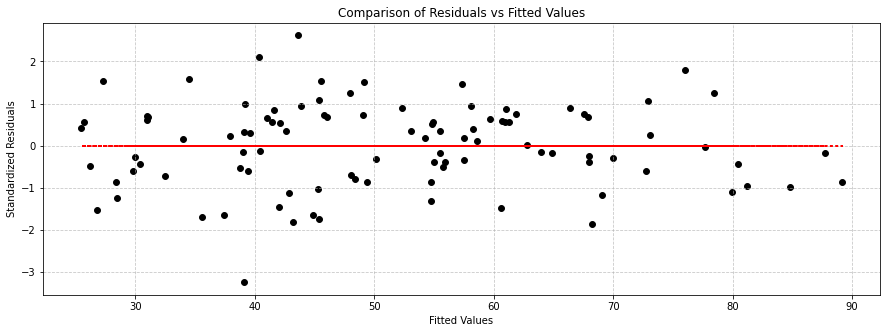

In [18]:
#Plot to check for heteroskedasticity
scaler = StandardScaler().fit(residuals.reshape(-1, 1))
norm_residuals = scaler.transform(residuals.reshape(-1, 1))


plt.figure(figsize=(15,5))
plt.grid(True, linestyle='--', alpha=0.7)
plt.title(f"Comparison of Residuals vs Fitted Values")

plt.scatter(reg.predict(X_train),norm_residuals,c='black',s=35)
plt.xlabel("Fitted Values")
plt.ylabel("Standardized Residuals")


# add trend line  
plt_lin_reg = linear_model.LinearRegression()
plt_lin_reg.fit(reg.predict(X_train).reshape(-1, 1), norm_residuals)  

trendline   = plt_lin_reg.predict(reg.predict(X_train).reshape(-1, 1))

# Plot the trendline
plt.plot(reg.predict(X_train), trendline, color='red', linewidth=2, linestyle='dotted')

As can be seen in the graph above, the model is not heteroskedastic as the spread of residuals is not increasing or decreasing as the Predicted value increases

In [19]:
residuals = model_wine.resid
# Breusch-Pagan test for heteroskedasticity
bp = het_breuschpagan(residuals, model_wine.model.exog)
measures = ('LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value')
print(dict(zip(measures,bp)))

{'LM Statistic': 7.873658119286442, 'LM-Test p-value': 0.546926989946379, 'F-Statistic': 0.9721742910713911, 'F-Test p-value': 0.46280326695953156}


In [20]:
corrected_model = model_wine.get_robustcov_results(cov_type = 'HC3')
print(corrected_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     972.7
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           2.27e-86
Time:                        15:34:53   Log-Likelihood:                -318.82
No. Observations:                 100   AIC:                             655.6
Df Residuals:                      91   BIC:                             679.1
Df Model:                           8                                         
Covariance Type:                  HC3                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8959      5.024      0.

##### Part c: Predicting value from new data

In [21]:
#Predict rating of Wine
wine_french         = np.array([39.99,13.9,1.83,1.1,2.1,0,1,0,0]).reshape(1,-1)
predicted_rating    = reg.predict(wine_french)[0]

print("Predicted Rating:", predicted_rating)

Predicted Rating: 76.39132200696588


##### Part d: Impact of increasing price on rating

Our model is:
  >`Rating = (0.936 x Price) + (3.429 x Alcohol) + (0.144 x Residual_Sugar) + (-13.867 x Sulphates) + (-0.879 x pH) + (-4.926 x Country_Canada) + (7.032 x Country_France) + (3.859 x Country_Italy) + (-5.965 x Country_US) + (1.119856)`

Therefore, according to the regression model, increasing the price will also increase in the expert rating, as the coefficient for Price is positive (0.936), which means if holding other factors constant, for every dollar increase will increase 0.936 points in rating

#### Question 4: Predictive Modeling - Prediction Analysis

In [22]:
df_curry  = pd.read_excel(file_path, sheet_name="Curry")

##### Part a: Building the model

In [24]:
features_curry  = df_curry.columns[2:].tolist()

#converting categorical columns to dummy variables
df_curry    = to_cat(df_curry)

The linear regression model is: Sales = (50.268 x Ad_Budget) + (-80.996 x Price) + (-9.296 x Distance) + (-510.468 x Country_CA) + (510.468 x Country_US) + (1102.179629)
R-squared value: 0.99044


In [25]:
df_curry    = to_cat(df_curry)
model       = ols(f"Sales ~ " + " + ".join(features_curry), data=df_curry)
model       = model.fit()

print(model.summary())

print(model.rsquared)

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     5049.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.25e-195
Time:                        15:35:39   Log-Likelihood:                -1527.8
No. Observations:                 200   AIC:                             3066.
Df Residuals:                     195   BIC:                             3082.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    734.7864    154.398      4.759      0.0

In [26]:
#Building the model equation
coeffs             = model.params
intercept          = model.params[0]

equation = ""
for coef, feat in zip(model.params, features_curry):
    equation += f"({coef:.2f} x {feat}) + "

print(f"The linear regression model for is: Sales = {equation}({model.params[0]:.2f})")
print(f"R-squared value: {model.rsquared:.5f}")


The linear regression model for is: Sales = (734.79 x Ad_Budget) + (50.27 x Price) + (-81.00 x Distance) + (-9.30 x Country_CA) + (-143.07 x Country_US) + (734.79)
R-squared value: 0.99044


**Process of Model Building**
1. Converted the string/object column into respective category columns with dummy variables
2. Performed linear regression on the new DataFrame (with the updated dummy variable columns) using `ols.fit()`
3. Checkkd the p-value of the different features and removed distance (p-value>0.05) as it doesn't have significant effect on the model, the R-squared value doesn't change significantly either and is still close to 1
| Comparison | Model with Distance | Model without Distance  |
|--------------------|--------------------|-------------|
| R-Squared  |0.990437 | 0.9903229 |

4. Extracted the coefficients from the model to build the equation

**Model**
The linear reression model satisfying the curry data is:
>*(734.79 x Ad_Budget) + (50.27 x Price) + (-81.00 x Distance) + (-9.30 x Country_CA) + (-143.07 x Country_US) + (734.79)*

##### Part b: Most Powerful Test: Wald Test

In [39]:
#Perform linear regression using ols
#Using new columns to interact Ad_Budget & Country_US and Ad_Budget & Country_CA
model   = ols('Sales ~ Ad_Budget + Price + Distance + Country_CA + Country_US + Ad_Budget:Country_US + Ad_Budget:Country_CA', data=df_curry)
model   = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     4036.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          6.26e-194
Time:                        15:55:22   Log-Likelihood:                -1527.3
No. Observations:                 200   AIC:                             3067.
Df Residuals:                     194   BIC:                             3086.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              711.1033 

In [40]:
#Perform Hypothesis Testing using the Wald Test
hypothesis  = '(Ad_Budget:Country_US=0, Ad_Budget:Country_CA=0)'

#print(model.wald_test(hypothesis, scalar=True))
print(model.wald_test(hypothesis))

<F test: F=array([[9754.07732557]]), p=2.2332461924764413e-195, df_denom=194, df_num=2>


**Hypothesis Test: Wald Test**
  > *Assume 95% confidence interval for testing*

1. This is the strongest test to use in this scenario where we are trying to find the significance of impact of individual features on the dependent variable
2. Problem Statement: As Ad Budget increases, the sales for the US consumers increase more than they do for Canadian consumers.
3. As a correlation between Ad Budget and Consumers is to be determined, we need to create a new columns that measure the interaction between both those parameters (Ad_Budget * Country_US and Ad_Budget * Country_CA)
4. Since the wald test is conducted using the `ols` library, it is important to fit the model using the ols method as well 

Once we have the linear regression model, we define the features we want to conduct the test on (in our case it is Canadian vs American consumers' response to the Budget, therefore we use new columns: `Ad_Budget:Country_US`  `Ad_Budget:Country_CA`
1. ***Null Hypothesis:*** US consumers **do not** respond more to the changes in Ad_Budget than Canadian consumers
2. ***Alternate Hypothesis:*** US consumers **do** respond more to the changes in Ad_Budget than Canadian consumers
3. ***p-value:*** $2.233\times 10^{-195}$ (which is lower than 0.05) therefore we **reject the null hypothesis**. This tells us that US consumers do respond more to the Ad budget changes than Canadian consumers.

##### Part c: Chow Test

In [29]:
df_curry  = pd.read_excel(file_path, sheet_name="Curry")

In [30]:
# Creating chow test Columns
df_curry['C_Obs']       = np.where(df_curry['Country'] == 'US', 1, 0)
df_curry['C_Ad_budget'] = df_curry['C_Obs']*df_curry['Ad_Budget']
df_curry['C_Price']     = df_curry['C_Obs']*df_curry['Price']
df_curry['C_Distance']  = df_curry['C_Obs']*df_curry['Distance']

In [31]:
df_curry.head()

,Obs,Sales,Ad_Budget,Price,Distance,Country,C_Obs,C_Ad_budget,C_Price,C_Distance
0,1,19103.638801,362.86,11.68,6,US,1,362.86,11.68,6
1,2,4255.801105,75.25,9.42,20,US,1,75.25,9.42,20
2,3,20508.337436,396.63,6.68,21,US,1,396.63,6.68,21
3,4,18261.580790,356.56,9.61,18,US,1,356.56,9.61,18
4,5,17401.910809,321.13,9.56,24,US,1,321.13,9.56,24


In [32]:
# Fitting the model with Chow test columns
model = ols('Sales ~ Ad_Budget + Price + Distance + C(Country) + C_Ad_budget + C_Price + C_Distance + C_Obs', data=df_curry)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2876.
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          1.17e-190
Time:                        15:35:40   Log-Likelihood:                -1526.5
No. Observations:                 200   AIC:                             3069.
Df Residuals:                     192   BIC:                             3095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          125.0916    436.436  

In [33]:
#Perform Hypothesis Testing using the Chow Test
hypothesis  = '(C_Ad_budget=0, C_Price=0, C_Distance=0, C_Obs)'

#print(model.wald_test(hypothesis, scalar=True))
print(model.wald_test(hypothesis))

<F test: F=array([[42.7717247]]), p=1.261467379946044e-25, df_denom=192, df_num=4>


**Hypothesis Test: Chow Test**
  > *Assume 95% confidence interval for testing*

1. We use the same model generated in the previous part b
2. Our structural break/change is between US and Canadian consumers

Once we have the linear regression model, we define the features we want to conduct the test on (in our case it is Canadian vs American consumers' response to the Budget, therefore we use columns: `Ad_Budget`  `Country_US`
1. ***Null Hypothesis:*** US consumers and Canadian consumers **react the same way** to circumstances (same coefficients)
2. ***Alternate Hypothesis:*** US consumers **do not react the same way** to circumstances (not the same coefficients)
3. ***p-value:*** $1.2615\times 10^{-25}$ (which is lower than 0.05) therefore we **reject the null hypothesis**. This tell us that US consumers and Canadian consumers do not respond to circumstances the same way

**Comparison: Wald Test vs Chow Test**

| Aspect | Wald Test | Chow Test |
|:--------------------|:--------------------|:-------------|
| Conclusion | US consumers respond more to Budget than Canadian | US consumers do not respond the same way to circumstances |
|Insight|Wald test specifically tested for interaction between specified paramters|Tests the response of all parameters on structure change|

Even though at face value both conclusions appear similar, there is a difference between what was actually tested. Wald test concludes that Canadians and Americans react differently but it only accounts for with respect to the budget. While Chow test concluded the same that Canadians and American react differently, it bases the analysis off all independent variables

## Appendix

#### Question 4: Part b

Text(0.5, 1.0, 'Ad Budget vs Sales')

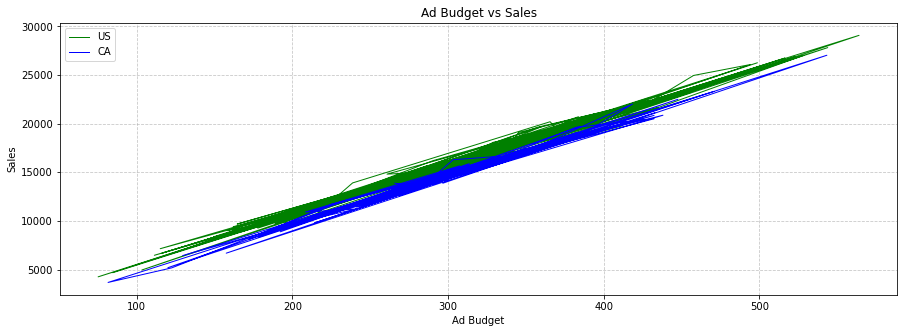

In [34]:
df_curry = to_cat(df_curry)

df_us = df_curry[df_curry["Country_US"] == 1]
df_ca = df_curry[df_curry["Country_CA"] == 1]

x_axis_1 = df_us["Ad_Budget"]
y_axis_1 = df_us["Sales"]

x_axis_2 = df_ca["Ad_Budget"]
y_axis_2 = df_ca["Sales"]

plt.figure(figsize=(15,5))
plt.grid(True, linestyle='--', alpha=0.7)
        
plt.plot(x_axis_1, y_axis_1, linewidth=1, color='green')
plt.plot(x_axis_2, y_axis_2, linewidth=1, color='blue')
plt.xlabel("Ad Budget")
plt.ylabel("Sales")

plt.legend(["US", "CA"])
plt.title("Ad Budget vs Sales")

We can see in the graph above that for the same Budget value, US consumers have higher sales than Candian consumers, thus corroborating out findins of the Wald test in part b.